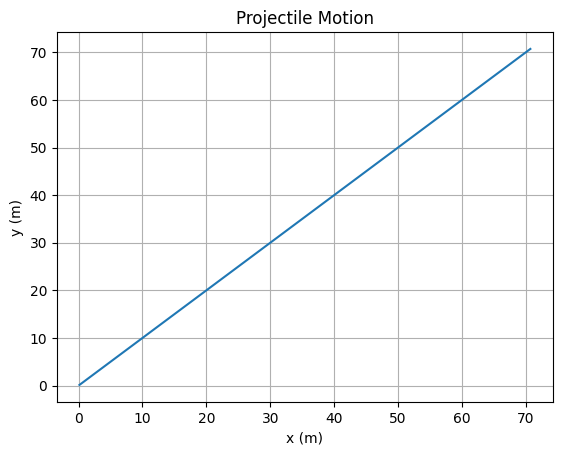

In [1]:
import sys
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory to sys.path so 'src' can be found
sys.path.append(os.path.abspath(".."))

from src.simulation.system import System
from src.simulation.forces import Gravity
from src.simulation.integrators import euler_step
from src.simulation.particles import Particle


# create system
system = System()

# Initial position
position = (0,0,0)

# Initial velocity
speed = 20.0          # m/s
angle_deg = 45        # in the x-y plane
angle_rad = angle_deg * (math.pi/180)
velocity = (speed * np.cos(angle_rad), speed * np.sin(angle_rad),0)    # 3d vector

# Add particle
p = Particle(position=position, velocity=velocity, mass=1.0)
system.add_particle(p)

# Add Gravity
g = Gravity(g=9.81)
system.add_force(g)

# Run the simulation

# time params
dt = 0.01
t_max = 5.0
positions = []

# Run loop
for _ in range(int(t_max / dt)):
    euler_step(system, dt)
    positions.append(system.particles[0].position.copy())

# Extract x and y fo plotting
positions = np.array(positions)
x = positions[:, 0]
y = positions[:, 1]

# Plot trajectory
plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Projectile Motion")
plt.grid(True)
plt.show()

